In [1]:
%matplotlib inline
### Standard imports
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

### HEPKIT imports
import hepkit.hepData as hd
import hepkit.hepPlot as hp
import hepkit.hepFormat as hf
### Settings
hf.DefaultSetup()

def PrintKeys(fileName):
    for k in uproot.open(fileName).allkeys():
        print(k)
        
def OpenRoot(fileName,tree):
    rTree = uproot.open(fileName)[tree]
    df = rTree.pandas.df(['*'],flatten=False,namedecode='utf-8')
    return df

# Special trick for string columns
def decodeList(l):
    return [x.decode(encoding='UTF-8') for x in l]

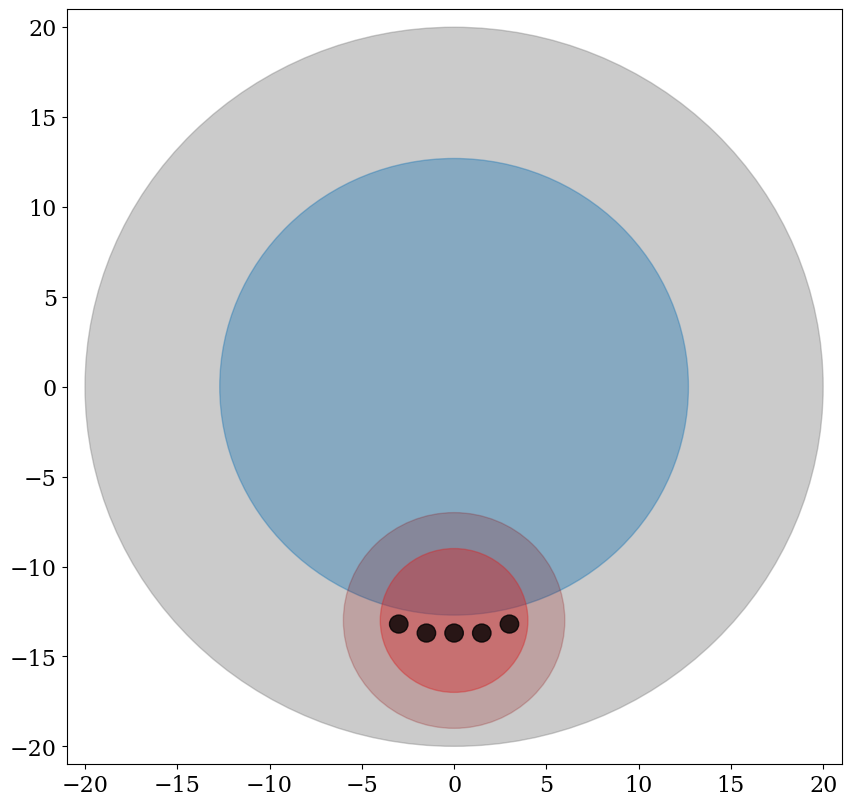

In [9]:
from matplotlib.patches import Circle, PathPatch

# Measurements
ptfe_d = 40
mirr_d = 25.4
disk_d = 12
source_d = 8
gap_wallSource = 1
source_y = -ptfe_d/2. + disk_d/2. + gap_wallSource

hole_d = 1
hole_gap = 0.5

xs, ys = {}, {}
# Create xs coordinates
step = hole_gap+hole_d
temp_xs = np.arange(-10*step,10*step+0.1,step)
for i,x in enumerate(temp_xs):
    xs[i-int(len(temp_xs)/2.)] = x    

# Create ys coordinates
y_start = -mirr_d/2. - hole_d - hole_gap*3.
step = hole_gap
temp_ys = np.arange(0,10,step)
for i,y in enumerate(temp_ys):
    ys[i] = y+y_start

cs = [
        [0,0,ptfe_d,'C7',0.4],
        [0,0,mirr_d,'C0',0.4],
        [0,source_y,disk_d,'darkred',0.2],
        [0,source_y,source_d,'C3',0.4],
    
#         [xs[0],ys[0],hole_d,'black',0.8],
#         [xs[1],ys[0],hole_d,'black',0.8],
#         [xs[-1],ys[0],hole_d,'black',0.8],
    
        [xs[0],ys[3],hole_d,'black',0.8],
        [xs[1],ys[3],hole_d,'black',0.8],
        [xs[-1],ys[3],hole_d,'black',0.8],
    
#         [xs[2],ys[1],hole_d,'black',0.8],
#         [xs[-2],ys[1],hole_d,'black',0.8],
        [xs[2],ys[4],hole_d,'black',0.8],
        [xs[-2],ys[4],hole_d,'black',0.8],
     ]
ps = []

for c in cs:
    ps.append(Circle((c[0], c[1]), c[2]/2., color=c[3], alpha=c[4]))

plt.figure(figsize=(10,10),facecolor='white',dpi=100)
ax = plt.gca()
for p in ps:
    ax.add_patch(p)

plt.xlim(-21,21)
plt.ylim(-21,21)
plt.show()

In [79]:
for t in ys:
    print(t, ys[t])

0 -15.2
1 -14.7
2 -14.2
3 -13.7
4 -13.2
5 -12.7
6 -12.2
7 -11.7
8 -11.2
9 -10.7
10 -10.2
11 -9.7
12 -9.2
13 -8.7
14 -8.2
15 -7.699999999999999
16 -7.199999999999999
17 -6.699999999999999
18 -6.199999999999999
19 -5.699999999999999
